In [48]:
import pandas as pd
import pickle
from Bio import SeqIO
import os
import numpy as np
import subprocess
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## Loading testing dataframe and removing MIBiG BGCs

In [5]:
training_df = pd.read_csv("./outputs/affinity_df-round4-TFL210427.txt",index_col=0)

training_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspCM7v1,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF995
5677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996
5678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996
5679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF997


In [6]:
training_bgcs = pickle.load( open("./outputs/affinity_bgcs-round4-TFL210427.txt", "rb" ) )

training_bgcs

['GCA_000737335.region031',
 'GCA_002994635.region018',
 'GCA_000170895.region002',
 'GCA_002994615.region022',
 'BGC0000844.1',
 'DS570624.region002',
 'BGC0000845.1',
 'BGC0000319.1',
 'DS570624.region019',
 'BGC0000373.1',
 'BGC0000940.1',
 '2747842505.region030',
 'GCA_002899455.region014',
 '2517572165.region052',
 'GCA_000365385.region030',
 'GCA_000377145.region006',
 'GCA_000424965.region016',
 'GCA_000377525.region018',
 'GCA_000514715.region025',
 '651717009.region006',
 'DS570624.region031',
 'GCA_000426165.region008',
 '2518285564.region046',
 'GCA_000158915.region019',
 'GCA_000377165.region004',
 'GCA_000377125.region004',
 '2515154206.region008',
 'GCA_000739105.region018',
 'GCA_000527195.region007',
 'BGC0000941.1',
 'GCA_000156695.region008',
 'GCA_000424765.region022',
 'GCA_000365385.region010',
 'GCA_000424805.region006',
 'GCA_000240165.region027',
 'GCA_000515055.region002',
 'GCA_000156435.region015',
 'BGC0001478.1',
 'GCA_000203835.region011',
 'GCA_000701285.

In [7]:
training_df['bgc'] = training_bgcs

training_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1,label,bgc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_000737335.region031
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_002994635.region018
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_000170895.region002
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_002994615.region022
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF2,BGC0000844.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF995,ERR3946851_contigs.region013
5677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996,ERR3941157_contigs.region006
5678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996,ERR3946770_contigs.region007
5679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF997,ERR3946819_contigs.region008


In [8]:
index_to_keep = []

for i,r in training_df.iterrows():
    if 'BGC' not in r['bgc']:
        index_to_keep.append(i)
        
training_df = training_df.loc[index_to_keep]
training_df.reset_index(inplace=True,drop=True)

training_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1,label,bgc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_000737335.region031
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_002994635.region018
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_000170895.region002
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_002994615.region022
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF2,DS570624.region002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF995,ERR3946851_contigs.region013
5417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996,ERR3941157_contigs.region006
5418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996,ERR3946770_contigs.region007
5419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF997,ERR3946819_contigs.region008


## Annotating BGC class

In [9]:
names_dict = {}
with open("./outputs/names_dict-round4-TFL210723.txt") as f:
    for line in f:
        (key, val) = line.split(',')
        names_dict[key] = val.strip('\n')
        
names_dict

{'c00017_NODE_17...region001': 'ERR2239797_contigs.region003',
 'c00219_NODE_21...region001': 'ERR2239719_contigs.region004',
 'c00533_NODE_53...region001': 'ERR3946850_contigs.region002',
 'c00003_NODE_3_...region001': 'ERR2239707_contigs.region002',
 'c00013_NODE_13...region001': 'ERR2239715_contigs.region001',
 'c00024_NODE_24...region001': 'ERR2239791_contigs.region002',
 'c00045_NODE_45...region001': 'ERR2239667_contigs.region001',
 'c00080_NODE_80...region001': 'ERR2239734_contigs.region001',
 'c00181_NODE_18...region001': 'ERR2239562_contigs.region002',
 'c00213_NODE_21...region001': 'ERR2239446_contigs.region002',
 'c00221_NODE_22...region001': 'ERR2239756_contigs.region002',
 'c00252_NODE_25...region001': 'ERR3946881_contigs.region003',
 'c00867_NODE_86...region001': 'ERR2239236_contigs.region005',
 'c01847_NODE_18...region001': 'ERR3941051_contigs.region011',
 'c02317_NODE_23...region001': 'ERR3941051_contigs.region012',
 'c04387_NODE_43...region001': 'ERR3941051_contigs.regi

In [10]:
def get_feature(updated_name,name_dict):
    for key in name_dict.keys():
        if name_dict[key] == updated_name:
            input_handle = open("/Volumes/TFL190831/ming_output/antismash/%s.fasta_output_results/%s.gbk"%(updated_name.split('.')[0],key),'r')
            for seq_record in SeqIO.parse(input_handle,'genbank'):
                edge_list,type_list = [],[]
                for feature in seq_record.features:
                    if feature.type == 'cand_cluster':
                        for qual in feature.qualifiers:
                            if qual == 'contig_edge':
                                ctg_edge = feature.qualifiers[qual]
                                edge_list.append(ctg_edge[0])
                            if qual == 'product':
                                bgc_type = feature.qualifiers[qual]
                                for item_type in bgc_type:
                                    if item_type not in type_list:
                                        type_list.append(item_type)
                return edge_list,type_list
                
get_feature('GCA_001767235.region004',names_dict)

(['False'], ['NRPS'])

## Finding out what are all antiSMASH classea to create classes_dict

In [11]:
def get_feature(updated_name,name_dict):
    for key in name_dict.keys():
        if name_dict[key] == updated_name:
            filename = "/Volumes/TFL190831/ming_output/antismash/%s.fasta_output_results/%s.gbk"%(updated_name.split('.')[0],key)
            if os.path.exists(filename):
                input_handle = open(filename,'r')
                for seq_record in SeqIO.parse(input_handle,'genbank'):
                    edge_list,type_list = [],[]
                    for feature in seq_record.features:
                        if feature.type == 'cand_cluster':
                            for qual in feature.qualifiers:
                                if qual == 'contig_edge':
                                    ctg_edge = feature.qualifiers[qual]
                                    edge_list.append(ctg_edge[0])
                                if qual == 'product':
                                    bgc_type = feature.qualifiers[qual]
                                    for item_type in bgc_type:
                                        if item_type not in type_list:
                                            type_list.append(item_type)
                    return edge_list,type_list
            else:
                return 'NA','NA'

In [9]:
all_classes = []

for i,r in training_df.iterrows():
    ctg_edge,class_list = get_feature(training_df['bgc'].loc[i],names_dict)
    for class_type in class_list:
        all_classes.append(class_type)
    
all_classes = np.unique(all_classes)

In [10]:
all_classes

array(['A', 'CDPS', 'LAP', 'N', 'NAGGN', 'NRPS', 'NRPS-like', 'PBDE',
       'PKS-like', 'PUFA', 'PpyS-KS', 'T1PKS', 'T2PKS', 'T3PKS',
       'TfuA-related', 'amglyccycl', 'arylpolyene', 'bacteriocin',
       'betalactone', 'blactam', 'butyrolactone', 'cyanobactin',
       'ectoine', 'furan', 'fused', 'hglE-KS', 'hserlactone', 'indole',
       'ladderane', 'lanthipeptide', 'lassopeptide', 'linaridin',
       'melanin', 'microviridin', 'nucleoside', 'oligosaccharide',
       'other', 'phenazine', 'phosphonate', 'proteusin', 'resorcinol',
       'sactipeptide', 'siderophore', 'terpene', 'thiopeptide',
       'transAT-PKS', 'transAT-PKS-like'], dtype='<U16')

In [11]:
len(all_classes)

47

## Creating a common dictionary

In [12]:
common_dict = {"A":"NA",
"CDPS":"NRPS",
"LAP":"RiPP",
"N":"NA",
"NAGGN":"NRPS",
"NRPS":"NRPS",
"NRPS-like":"NRPS",
"PBDE":"Phenolic",
"PKS-like":"PKS",
"PUFA":"PKS",
"PpyS-KS":"PKS",
"T1PKS":"PKS",
"T2PKS":"PKS",
"T3PKS":"PKS",
"TfuA-related":"RiPP",
"amglyccycl":"Minor",
"arylpolyene":["PKS","Phenolic"],
"bacteriocin":"RiPP",
"betalactone":"Minor",
"blactam":"Minor",
"butyrolactone":"Minor",
"cyanobactin":"RiPP",
"ectoine":"Minor",
"furan":"Minor",
"fused":"Minor",
"hglE-KS":"PKS",
"hserlactone":["PKS","NRPS"],
"indole":"Minor",
"ladderane":"RiPP",
"lanthipeptide":"RiPP",
"lassopeptide":"RiPP",
"linaridin":"RiPP",
"melanin":"NRPS",
"microviridin":"RiPP",
"nucleoside":"Nucleoside",
"oligosaccharide":"Oligosaccharide",
"other":"Other",
"phenazine":"Minor",
"phosphonate":"Phosphonate",
"proteusin":"RiPP",
"resorcinol":"PKS",
"sactipeptide":"RiPP",
"siderophore":"Siderophore",
"terpene":"Terpene",
"thiopeptide":"RiPP",
"transAT-PKS":"PKS",
"transAT-PKS-like":"PKS"}

In [13]:
common_dict

{'A': 'NA',
 'CDPS': 'NRPS',
 'LAP': 'RiPP',
 'N': 'NA',
 'NAGGN': 'NRPS',
 'NRPS': 'NRPS',
 'NRPS-like': 'NRPS',
 'PBDE': 'Phenolic',
 'PKS-like': 'PKS',
 'PUFA': 'PKS',
 'PpyS-KS': 'PKS',
 'T1PKS': 'PKS',
 'T2PKS': 'PKS',
 'T3PKS': 'PKS',
 'TfuA-related': 'RiPP',
 'amglyccycl': 'Minor',
 'arylpolyene': ['PKS', 'Phenolic'],
 'bacteriocin': 'RiPP',
 'betalactone': 'Minor',
 'blactam': 'Minor',
 'butyrolactone': 'Minor',
 'cyanobactin': 'RiPP',
 'ectoine': 'Minor',
 'furan': 'Minor',
 'fused': 'Minor',
 'hglE-KS': 'PKS',
 'hserlactone': ['PKS', 'NRPS'],
 'indole': 'Minor',
 'ladderane': 'RiPP',
 'lanthipeptide': 'RiPP',
 'lassopeptide': 'RiPP',
 'linaridin': 'RiPP',
 'melanin': 'NRPS',
 'microviridin': 'RiPP',
 'nucleoside': 'Nucleoside',
 'oligosaccharide': 'Oligosaccharide',
 'other': 'Other',
 'phenazine': 'Minor',
 'phosphonate': 'Phosphonate',
 'proteusin': 'RiPP',
 'resorcinol': 'PKS',
 'sactipeptide': 'RiPP',
 'siderophore': 'Siderophore',
 'terpene': 'Terpene',
 'thiopeptide': '

## Expanding training dataframe

In [14]:
training_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1,label,bgc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_000737335.region031
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_002994635.region018
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_000170895.region002
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1,GCA_002994615.region022
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF2,DS570624.region002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF995,ERR3946851_contigs.region013
5417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996,ERR3941157_contigs.region006
5418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996,ERR3946770_contigs.region007
5419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF997,ERR3946819_contigs.region008


In [15]:
final_classes = []
combined_list = []

for i,r in training_df.iterrows():
    ctg_edge,class_list = get_feature(training_df['bgc'].loc[i],names_dict)
    combined_classes = []
    for bgc_class in class_list:
        if type(common_dict[bgc_class]) != list:
            combined_classes.append(common_dict[bgc_class])
            if common_dict[bgc_class] not in final_classes:
                final_classes.append(common_dict[bgc_class])
        else:
            for item in common_dict[bgc_class]:
                combined_classes.append(item)
                if item not in final_classes:
                    final_classes.append(item)
    combined_list.append(combined_classes)
    print(i,class_list,'-',combined_classes)

0 ['siderophore'] - ['Siderophore']
1 ['siderophore'] - ['Siderophore']
2 ['siderophore'] - ['Siderophore']
3 ['siderophore'] - ['Siderophore']
4 NA - ['NA', 'NA']
5 NA - ['NA', 'NA']
6 ['siderophore'] - ['Siderophore']
7 ['siderophore'] - ['Siderophore']
8 ['siderophore'] - ['Siderophore']
9 ['siderophore'] - ['Siderophore']
10 ['siderophore'] - ['Siderophore']
11 ['siderophore'] - ['Siderophore']
12 ['terpene'] - ['Terpene']
13 ['siderophore'] - ['Siderophore']
14 ['siderophore'] - ['Siderophore']
15 NA - ['NA', 'NA']
16 ['siderophore'] - ['Siderophore']
17 ['siderophore'] - ['Siderophore']
18 ['siderophore'] - ['Siderophore']
19 ['siderophore'] - ['Siderophore']
20 ['siderophore'] - ['Siderophore']
21 ['siderophore'] - ['Siderophore']
22 ['siderophore'] - ['Siderophore']
23 ['siderophore'] - ['Siderophore']
24 ['siderophore'] - ['Siderophore']
25 ['siderophore'] - ['Siderophore']
26 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
27 ['siderophore'] - ['Siderophore']
28 ['siderophore'] - ['Sider

264 ['NRPS', 'blactam', 'T1PKS'] - ['NRPS', 'Minor', 'PKS']
265 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
266 NA - ['NA', 'NA']
267 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
268 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
269 ['bacteriocin'] - ['RiPP']
270 ['transAT-PKS', 'PKS-like', 'bacteriocin', 'T1PKS', 'NRPS'] - ['PKS', 'PKS', 'RiPP', 'PKS', 'NRPS']
271 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
272 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
273 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
274 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
275 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
276 ['NRPS'] - ['NRPS']
277 ['terpene', 'NRPS-like', 'betalactone'] - ['Terpene', 'NRPS', 'Minor']
278 ['terpene', 'NRPS-like', 'betalactone'] - ['Terpene', 'NRPS', 'Minor']
279 ['terpene'] - ['Terpene']
280 ['terpene'] - ['Terpene']
281 ['terpene'] - ['Terpene']
282 ['NRPS'] - ['NRPS']
283 ['lanthipeptide'] - ['RiPP']
284 ['lanthipeptide'] - ['RiPP']
285 ['lanthipeptide'] - ['RiPP']
286 ['lanthipeptide'] - ['RiPP']
287 ['lanthipeptide'] - ['RiPP']
288 ['lant

472 ['arylpolyene'] - ['PKS', 'Phenolic']
473 ['arylpolyene'] - ['PKS', 'Phenolic']
474 ['arylpolyene'] - ['PKS', 'Phenolic']
475 ['arylpolyene'] - ['PKS', 'Phenolic']
476 ['arylpolyene'] - ['PKS', 'Phenolic']
477 ['arylpolyene'] - ['PKS', 'Phenolic']
478 ['arylpolyene'] - ['PKS', 'Phenolic']
479 ['arylpolyene'] - ['PKS', 'Phenolic']
480 ['arylpolyene'] - ['PKS', 'Phenolic']
481 ['arylpolyene'] - ['PKS', 'Phenolic']
482 ['arylpolyene'] - ['PKS', 'Phenolic']
483 ['arylpolyene'] - ['PKS', 'Phenolic']
484 ['arylpolyene'] - ['PKS', 'Phenolic']
485 ['arylpolyene'] - ['PKS', 'Phenolic']
486 ['arylpolyene'] - ['PKS', 'Phenolic']
487 ['arylpolyene'] - ['PKS', 'Phenolic']
488 ['arylpolyene'] - ['PKS', 'Phenolic']
489 ['arylpolyene'] - ['PKS', 'Phenolic']
490 ['arylpolyene'] - ['PKS', 'Phenolic']
491 ['arylpolyene'] - ['PKS', 'Phenolic']
492 ['arylpolyene'] - ['PKS', 'Phenolic']
493 ['arylpolyene'] - ['PKS', 'Phenolic']
494 ['arylpolyene'] - ['PKS', 'Phenolic']
495 ['arylpolyene'] - ['PKS', 'Phe

689 ['NRPS-like'] - ['NRPS']
690 ['NRPS-like'] - ['NRPS']
691 ['NRPS-like'] - ['NRPS']
692 ['NRPS-like'] - ['NRPS']
693 ['NRPS-like'] - ['NRPS']
694 ['NRPS-like'] - ['NRPS']
695 ['NRPS-like'] - ['NRPS']
696 ['NRPS-like'] - ['NRPS']
697 ['NRPS-like'] - ['NRPS']
698 ['NRPS-like'] - ['NRPS']
699 ['NRPS-like'] - ['NRPS']
700 ['NRPS-like'] - ['NRPS']
701 ['hserlactone'] - ['PKS', 'NRPS']
702 ['hserlactone'] - ['PKS', 'NRPS']
703 ['hserlactone'] - ['PKS', 'NRPS']
704 ['hserlactone'] - ['PKS', 'NRPS']
705 ['hserlactone'] - ['PKS', 'NRPS']
706 ['hserlactone'] - ['PKS', 'NRPS']
707 ['hserlactone'] - ['PKS', 'NRPS']
708 ['hserlactone'] - ['PKS', 'NRPS']
709 ['hserlactone'] - ['PKS', 'NRPS']
710 ['hserlactone'] - ['PKS', 'NRPS']
711 ['hserlactone'] - ['PKS', 'NRPS']
712 ['hserlactone'] - ['PKS', 'NRPS']
713 ['hserlactone'] - ['PKS', 'NRPS']
714 ['NAGGN'] - ['NRPS']
715 ['NAGGN'] - ['NRPS']
716 ['NAGGN'] - ['NRPS']
717 ['NAGGN'] - ['NRPS']
718 ['NAGGN'] - ['NRPS']
719 ['NAGGN'] - ['NRPS']
720 ['NA

949 ['NRPS'] - ['NRPS']
950 ['NRPS'] - ['NRPS']
951 ['NRPS'] - ['NRPS']
952 ['NRPS'] - ['NRPS']
953 ['NRPS'] - ['NRPS']
954 ['NRPS'] - ['NRPS']
955 ['NRPS'] - ['NRPS']
956 ['NRPS'] - ['NRPS']
957 ['NRPS'] - ['NRPS']
958 ['NRPS'] - ['NRPS']
959 ['NRPS'] - ['NRPS']
960 ['NRPS'] - ['NRPS']
961 ['NRPS'] - ['NRPS']
962 ['NRPS'] - ['NRPS']
963 ['NRPS'] - ['NRPS']
964 ['NRPS'] - ['NRPS']
965 ['NRPS'] - ['NRPS']
966 ['NRPS'] - ['NRPS']
967 ['NRPS'] - ['NRPS']
968 ['NRPS'] - ['NRPS']
969 ['NRPS'] - ['NRPS']
970 ['NRPS'] - ['NRPS']
971 ['NRPS'] - ['NRPS']
972 ['NRPS'] - ['NRPS']
973 ['NRPS'] - ['NRPS']
974 ['NRPS'] - ['NRPS']
975 ['NRPS'] - ['NRPS']
976 ['NRPS'] - ['NRPS']
977 ['NRPS'] - ['NRPS']
978 ['NRPS'] - ['NRPS']
979 ['NRPS'] - ['NRPS']
980 ['NRPS'] - ['NRPS']
981 ['NRPS'] - ['NRPS']
982 ['NRPS'] - ['NRPS']
983 ['NRPS'] - ['NRPS']
984 ['NRPS'] - ['NRPS']
985 ['NRPS'] - ['NRPS']
986 ['NRPS'] - ['NRPS']
987 ['NRPS'] - ['NRPS']
988 ['NRPS'] - ['NRPS']
989 ['NRPS'] - ['NRPS']
990 ['NRPS'] - [

1244 ['bacteriocin'] - ['RiPP']
1245 ['bacteriocin'] - ['RiPP']
1246 ['NRPS'] - ['NRPS']
1247 NA - ['NA', 'NA']
1248 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1249 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1250 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1251 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1252 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1253 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1254 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1255 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1256 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1257 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
1258 ['arylpolyene'] - ['PKS', 'Phenolic']
1259 ['arylpolyene'] - ['PKS', 'Phenolic']
1260 ['phenazine'] - ['Minor']
1261 ['arylpolyene'] - ['PKS', 'Phenolic']
1262 ['arylpolyene'] - ['PKS', 'Phenolic']
1263 ['arylpolyene'] - ['PKS', 'Phenolic']
1264 ['arylpolyene'] - ['PKS', 'Phenolic']
1265 ['arylpolyene'] - ['PKS', 'Phenolic']
1266 ['arylpolyene'] - ['PKS', 'Phenolic']
1267 ['arylpolyene'] - ['PKS', 'Phenolic']
1268 ['arylpolyene'] - ['PKS', 'Phenolic']
1269 NA - ['NA', 

1459 ['T2PKS'] - ['PKS']
1460 ['T2PKS'] - ['PKS']
1461 ['T2PKS'] - ['PKS']
1462 ['T2PKS'] - ['PKS']
1463 ['T2PKS'] - ['PKS']
1464 ['T2PKS'] - ['PKS']
1465 ['T2PKS'] - ['PKS']
1466 ['T2PKS'] - ['PKS']
1467 ['T2PKS'] - ['PKS']
1468 ['T2PKS'] - ['PKS']
1469 ['T2PKS'] - ['PKS']
1470 ['T2PKS'] - ['PKS']
1471 ['T2PKS'] - ['PKS']
1472 ['T2PKS'] - ['PKS']
1473 ['T2PKS'] - ['PKS']
1474 ['T2PKS'] - ['PKS']
1475 ['T2PKS'] - ['PKS']
1476 ['T2PKS'] - ['PKS']
1477 ['T2PKS'] - ['PKS']
1478 ['T2PKS'] - ['PKS']
1479 ['siderophore'] - ['Siderophore']
1480 ['siderophore'] - ['Siderophore']
1481 ['siderophore'] - ['Siderophore']
1482 ['siderophore'] - ['Siderophore']
1483 ['siderophore'] - ['Siderophore']
1484 ['siderophore'] - ['Siderophore']
1485 ['siderophore'] - ['Siderophore']
1486 ['siderophore'] - ['Siderophore']
1487 ['siderophore'] - ['Siderophore']
1488 ['siderophore'] - ['Siderophore']
1489 ['siderophore'] - ['Siderophore']
1490 ['siderophore'] - ['Siderophore']
1491 ['siderophore'] - ['Siderop

1703 ['NRPS'] - ['NRPS']
1704 ['NRPS'] - ['NRPS']
1705 ['terpene'] - ['Terpene']
1706 ['terpene'] - ['Terpene']
1707 ['terpene'] - ['Terpene']
1708 ['bacteriocin'] - ['RiPP']
1709 ['bacteriocin'] - ['RiPP']
1710 ['bacteriocin'] - ['RiPP']
1711 ['bacteriocin'] - ['RiPP']
1712 ['bacteriocin'] - ['RiPP']
1713 ['bacteriocin'] - ['RiPP']
1714 ['bacteriocin'] - ['RiPP']
1715 ['bacteriocin'] - ['RiPP']
1716 ['bacteriocin'] - ['RiPP']
1717 ['bacteriocin'] - ['RiPP']
1718 ['bacteriocin'] - ['RiPP']
1719 ['bacteriocin'] - ['RiPP']
1720 ['bacteriocin'] - ['RiPP']
1721 ['bacteriocin'] - ['RiPP']
1722 ['bacteriocin'] - ['RiPP']
1723 ['bacteriocin'] - ['RiPP']
1724 ['bacteriocin'] - ['RiPP']
1725 ['bacteriocin'] - ['RiPP']
1726 ['bacteriocin'] - ['RiPP']
1727 ['siderophore'] - ['Siderophore']
1728 ['siderophore'] - ['Siderophore']
1729 ['betalactone'] - ['Minor']
1730 ['betalactone'] - ['Minor']
1731 ['ladderane'] - ['RiPP']
1732 ['ladderane'] - ['RiPP']
1733 ['bacteriocin'] - ['RiPP']
1734 ['bacter

1925 ['T1PKS'] - ['PKS']
1926 ['bacteriocin'] - ['RiPP']
1927 ['T1PKS'] - ['PKS']
1928 ['NRPS'] - ['NRPS']
1929 ['NRPS'] - ['NRPS']
1930 ['NRPS'] - ['NRPS']
1931 ['bacteriocin'] - ['RiPP']
1932 ['T1PKS'] - ['PKS']
1933 ['NRPS'] - ['NRPS']
1934 ['bacteriocin'] - ['RiPP']
1935 ['bacteriocin'] - ['RiPP']
1936 ['T1PKS'] - ['PKS']
1937 ['terpene'] - ['Terpene']
1938 ['NRPS'] - ['NRPS']
1939 ['terpene'] - ['Terpene']
1940 ['terpene'] - ['Terpene']
1941 ['T3PKS'] - ['PKS']
1942 ['T3PKS'] - ['PKS']
1943 ['T3PKS'] - ['PKS']
1944 ['NRPS'] - ['NRPS']
1945 ['NRPS-like'] - ['NRPS']
1946 ['bacteriocin'] - ['RiPP']
1947 ['bacteriocin'] - ['RiPP']
1948 ['T2PKS', 'oligosaccharide', 'PKS-like', 'NRPS'] - ['PKS', 'Oligosaccharide', 'PKS', 'NRPS']
1949 ['bacteriocin'] - ['RiPP']
1950 NA - ['NA', 'NA']
1951 ['NRPS-like'] - ['NRPS']
1952 ['NRPS-like'] - ['NRPS']
1953 ['NRPS-like'] - ['NRPS']
1954 ['NRPS-like'] - ['NRPS']
1955 ['NRPS-like'] - ['NRPS']
1956 ['NRPS-like'] - ['NRPS']
1957 ['NRPS-like'] - ['NRPS

2163 ['T3PKS'] - ['PKS']
2164 ['terpene'] - ['Terpene']
2165 ['T2PKS'] - ['PKS']
2166 ['T2PKS'] - ['PKS']
2167 ['T2PKS'] - ['PKS']
2168 ['T2PKS'] - ['PKS']
2169 NA - ['NA', 'NA']
2170 ['terpene', 'other'] - ['Terpene', 'Other']
2171 ['T2PKS'] - ['PKS']
2172 ['other', 'furan'] - ['Other', 'Minor']
2173 ['T3PKS', 'other', 'terpene'] - ['PKS', 'Other', 'Terpene']
2174 ['T2PKS'] - ['PKS']
2175 ['butyrolactone'] - ['Minor']
2176 ['terpene', 'T3PKS'] - ['Terpene', 'PKS']
2177 ['other', 'furan'] - ['Other', 'Minor']
2178 ['T2PKS'] - ['PKS']
2179 ['T3PKS', 'terpene'] - ['PKS', 'Terpene']
2180 ['T3PKS', 'terpene'] - ['PKS', 'Terpene']
2181 ['T3PKS'] - ['PKS']
2182 ['T2PKS', 'T1PKS', 'PKS-like', 'phenazine'] - ['PKS', 'PKS', 'PKS', 'Minor']
2183 ['T2PKS'] - ['PKS']
2184 ['other', 'furan'] - ['Other', 'Minor']
2185 ['T3PKS'] - ['PKS']
2186 ['NRPS', 'T3PKS', 'terpene'] - ['NRPS', 'PKS', 'Terpene']
2187 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
2188 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
2189 ['NRPS', 'T1PK

2406 ['NRPS'] - ['NRPS']
2407 ['other', 'phenazine', 'NRPS'] - ['Other', 'Minor', 'NRPS']
2408 ['other', 'phenazine'] - ['Other', 'Minor']
2409 ['NRPS'] - ['NRPS']
2410 ['NRPS'] - ['NRPS']
2411 ['other', 'phenazine', 'NRPS'] - ['Other', 'Minor', 'NRPS']
2412 ['T1PKS'] - ['PKS']
2413 ['other', 'phenazine'] - ['Other', 'Minor']
2414 ['NRPS'] - ['NRPS']
2415 ['T2PKS'] - ['PKS']
2416 ['T2PKS'] - ['PKS']
2417 ['T2PKS'] - ['PKS']
2418 ['T2PKS'] - ['PKS']
2419 ['T2PKS'] - ['PKS']
2420 ['T2PKS'] - ['PKS']
2421 ['T2PKS'] - ['PKS']
2422 ['T2PKS'] - ['PKS']
2423 ['T2PKS'] - ['PKS']
2424 ['T2PKS'] - ['PKS']
2425 ['T2PKS'] - ['PKS']
2426 ['terpene'] - ['Terpene']
2427 ['terpene'] - ['Terpene']
2428 ['terpene'] - ['Terpene']
2429 ['terpene'] - ['Terpene']
2430 ['terpene'] - ['Terpene']
2431 ['terpene'] - ['Terpene']
2432 ['terpene'] - ['Terpene']
2433 ['terpene'] - ['Terpene']
2434 ['terpene'] - ['Terpene']
2435 ['terpene'] - ['Terpene']
2436 ['terpene'] - ['Terpene']
2437 ['terpene'] - ['Terpene']


2667 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
2668 ['T1PKS'] - ['PKS']
2669 ['NRPS-like'] - ['NRPS']
2670 ['NRPS-like'] - ['NRPS']
2671 ['NRPS-like'] - ['NRPS']
2672 ['T3PKS'] - ['PKS']
2673 ['T3PKS'] - ['PKS']
2674 ['T3PKS'] - ['PKS']
2675 ['T3PKS'] - ['PKS']
2676 ['bacteriocin'] - ['RiPP']
2677 ['bacteriocin'] - ['RiPP']
2678 ['bacteriocin'] - ['RiPP']
2679 ['bacteriocin'] - ['RiPP']
2680 ['terpene'] - ['Terpene']
2681 ['terpene'] - ['Terpene']
2682 ['terpene'] - ['Terpene']
2683 ['terpene'] - ['Terpene']
2684 ['ladderane'] - ['RiPP']
2685 ['ladderane'] - ['RiPP']
2686 ['terpene'] - ['Terpene']
2687 ['terpene'] - ['Terpene']
2688 ['lanthipeptide'] - ['RiPP']
2689 ['lanthipeptide'] - ['RiPP']
2690 ['lanthipeptide'] - ['RiPP']
2691 NA - ['NA', 'NA']
2692 NA - ['NA', 'NA']
2693 NA - ['NA', 'NA']
2694 ['T1PKS'] - ['PKS']
2695 NA - ['NA', 'NA']
2696 NA - ['NA', 'NA']
2697 NA - ['NA', 'NA']
2698 NA - ['NA', 'NA']
2699 NA - ['NA', 'NA']
2700 NA - ['NA', 'NA']
2701 NA - ['NA', 'NA']
2702 NA - ['N

2930 ['NRPS', 'T1PKS', 'PUFA', 'hglE-KS'] - ['NRPS', 'PKS', 'PKS', 'PKS']
2931 ['NRPS'] - ['NRPS']
2932 ['NRPS'] - ['NRPS']
2933 ['T1PKS', 'NRPS'] - ['PKS', 'NRPS']
2934 ['bacteriocin', 'PpyS-KS'] - ['RiPP', 'PKS']
2935 ['arylpolyene', 'NRPS', 'ladderane'] - ['PKS', 'Phenolic', 'NRPS', 'RiPP']
2936 ['T1PKS'] - ['PKS']
2937 ['T3PKS', 'transAT-PKS-like', 'transAT-PKS', 'PKS-like'] - ['PKS', 'PKS', 'PKS', 'PKS']
2938 ['NRPS'] - ['NRPS']
2939 ['NRPS'] - ['NRPS']
2940 ['NRPS'] - ['NRPS']
2941 ['T1PKS', 'NRPS', 'betalactone', 'lanthipeptide'] - ['PKS', 'NRPS', 'Minor', 'RiPP']
2942 ['other', 'nucleoside'] - ['Other', 'Nucleoside']
2943 ['NRPS'] - ['NRPS']
2944 ['T1PKS', 'NRPS', 'melanin', 'hglE-KS'] - ['PKS', 'NRPS', 'NRPS', 'PKS']
2945 ['siderophore'] - ['Siderophore']
2946 ['siderophore'] - ['Siderophore']
2947 ['bacteriocin'] - ['RiPP']
2948 ['siderophore'] - ['Siderophore']
2949 ['siderophore'] - ['Siderophore']
2950 NA - ['NA', 'NA']
2951 ['NRPS', 'lassopeptide'] - ['NRPS', 'RiPP']
2952

3167 ['terpene'] - ['Terpene']
3168 ['terpene'] - ['Terpene']
3169 ['terpene'] - ['Terpene']
3170 ['terpene'] - ['Terpene']
3171 ['terpene'] - ['Terpene']
3172 ['terpene'] - ['Terpene']
3173 ['terpene'] - ['Terpene']
3174 ['terpene', 'T1PKS'] - ['Terpene', 'PKS']
3175 ['terpene'] - ['Terpene']
3176 ['terpene'] - ['Terpene']
3177 ['terpene'] - ['Terpene']
3178 ['terpene'] - ['Terpene']
3179 ['terpene'] - ['Terpene']
3180 ['lassopeptide'] - ['RiPP']
3181 ['lassopeptide'] - ['RiPP']
3182 ['lassopeptide'] - ['RiPP']
3183 ['microviridin'] - ['RiPP']
3184 ['microviridin'] - ['RiPP']
3185 ['microviridin'] - ['RiPP']
3186 ['microviridin'] - ['RiPP']
3187 ['microviridin'] - ['RiPP']
3188 ['microviridin'] - ['RiPP']
3189 ['microviridin'] - ['RiPP']
3190 ['CDPS'] - ['NRPS']
3191 ['CDPS'] - ['NRPS']
3192 ['T1PKS', 'CDPS'] - ['PKS', 'NRPS']
3193 ['T1PKS', 'NRPS-like'] - ['PKS', 'NRPS']
3194 ['T1PKS', 'NRPS-like'] - ['PKS', 'NRPS']
3195 ['CDPS'] - ['NRPS']
3196 ['NRPS-like'] - ['NRPS']
3197 ['T1PKS'

3428 ['NRPS-like'] - ['NRPS']
3429 ['NRPS'] - ['NRPS']
3430 ['NRPS-like'] - ['NRPS']
3431 ['NRPS'] - ['NRPS']
3432 ['NRPS'] - ['NRPS']
3433 ['NRPS'] - ['NRPS']
3434 ['terpene'] - ['Terpene']
3435 ['terpene'] - ['Terpene']
3436 ['T1PKS', 'PKS-like', 'T3PKS', 'NRPS'] - ['PKS', 'PKS', 'PKS', 'NRPS']
3437 ['T3PKS', 'T1PKS', 'PKS-like'] - ['PKS', 'PKS', 'PKS']
3438 ['hglE-KS'] - ['PKS']
3439 ['hglE-KS'] - ['PKS']
3440 ['NRPS'] - ['NRPS']
3441 ['NRPS'] - ['NRPS']
3442 ['NRPS'] - ['NRPS']
3443 ['terpene'] - ['Terpene']
3444 ['terpene'] - ['Terpene']
3445 ['terpene'] - ['Terpene']
3446 ['terpene'] - ['Terpene']
3447 ['betalactone', 'NRPS-like'] - ['Minor', 'NRPS']
3448 ['NRPS-like'] - ['NRPS']
3449 ['CDPS'] - ['NRPS']
3450 ['CDPS'] - ['NRPS']
3451 ['NRPS-like'] - ['NRPS']
3452 ['NRPS-like'] - ['NRPS']
3453 ['cyanobactin'] - ['RiPP']
3454 ['cyanobactin'] - ['RiPP']
3455 ['NRPS'] - ['NRPS']
3456 ['NRPS'] - ['NRPS']
3457 ['NRPS'] - ['NRPS']
3458 ['NRPS'] - ['NRPS']
3459 ['NRPS'] - ['NRPS']
3460 [

3685 ['bacteriocin'] - ['RiPP']
3686 ['siderophore'] - ['Siderophore']
3687 ['siderophore'] - ['Siderophore']
3688 ['siderophore'] - ['Siderophore']
3689 ['NRPS'] - ['NRPS']
3690 ['NRPS'] - ['NRPS']
3691 ['NRPS-like'] - ['NRPS']
3692 ['NRPS-like'] - ['NRPS']
3693 ['terpene'] - ['Terpene']
3694 ['terpene'] - ['Terpene']
3695 ['lanthipeptide'] - ['RiPP']
3696 ['lanthipeptide'] - ['RiPP']
3697 ['terpene'] - ['Terpene']
3698 ['terpene'] - ['Terpene']
3699 ['terpene'] - ['Terpene']
3700 ['terpene'] - ['Terpene']
3701 ['terpene'] - ['Terpene']
3702 ['lanthipeptide'] - ['RiPP']
3703 ['lanthipeptide'] - ['RiPP']
3704 ['siderophore'] - ['Siderophore']
3705 ['T2PKS', 'oligosaccharide', 'other'] - ['PKS', 'Oligosaccharide', 'Other']
3706 ['siderophore', 'T2PKS', 'oligosaccharide', 'other'] - ['Siderophore', 'PKS', 'Oligosaccharide', 'Other']
3707 ['transAT-PKS', 'NRPS', 'PKS-like'] - ['PKS', 'NRPS', 'PKS']
3708 ['transAT-PKS', 'NRPS', 'PKS-like'] - ['PKS', 'NRPS', 'PKS']
3709 ['NRPS', 'oligosacch

3930 ['NRPS'] - ['NRPS']
3931 ['NRPS'] - ['NRPS']
3932 ['NRPS'] - ['NRPS']
3933 ['NRPS'] - ['NRPS']
3934 ['TfuA-related', 'bacteriocin'] - ['RiPP', 'RiPP']
3935 ['NRPS', 'TfuA-related', 'bacteriocin'] - ['NRPS', 'RiPP', 'RiPP']
3936 ['NRPS'] - ['NRPS']
3937 ['NRPS'] - ['NRPS']
3938 ['NRPS'] - ['NRPS']
3939 ['NRPS'] - ['NRPS']
3940 ['NRPS'] - ['NRPS']
3941 ['NRPS'] - ['NRPS']
3942 ['NRPS'] - ['NRPS']
3943 ['NRPS'] - ['NRPS']
3944 ['NRPS'] - ['NRPS']
3945 ['NRPS'] - ['NRPS']
3946 ['NRPS'] - ['NRPS']
3947 ['NRPS'] - ['NRPS']
3948 ['NRPS'] - ['NRPS']
3949 ['NRPS'] - ['NRPS']
3950 ['NRPS'] - ['NRPS']
3951 ['NRPS', 'NRPS-like'] - ['NRPS', 'NRPS']
3952 ['NRPS', 'NRPS-like'] - ['NRPS', 'NRPS']
3953 ['NRPS-like'] - ['NRPS']
3954 ['NRPS', 'NRPS-like'] - ['NRPS', 'NRPS']
3955 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
3956 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
3957 ['NRPS', 'T1PKS'] - ['NRPS', 'PKS']
3958 ['NRPS'] - ['NRPS']
3959 ['NRPS'] - ['NRPS']
3960 ['NRPS'] - ['NRPS']
3961 ['NRPS'] - ['NRPS']
3962 [

4185 ['sactipeptide'] - ['RiPP']
4186 ['sactipeptide'] - ['RiPP']
4187 ['NRPS'] - ['NRPS']
4188 ['sactipeptide'] - ['RiPP']
4189 ['sactipeptide'] - ['RiPP']
4190 ['sactipeptide'] - ['RiPP']
4191 ['sactipeptide'] - ['RiPP']
4192 ['sactipeptide'] - ['RiPP']
4193 ['sactipeptide'] - ['RiPP']
4194 ['sactipeptide'] - ['RiPP']
4195 ['sactipeptide'] - ['RiPP']
4196 ['sactipeptide'] - ['RiPP']
4197 ['sactipeptide'] - ['RiPP']
4198 ['sactipeptide'] - ['RiPP']
4199 ['sactipeptide'] - ['RiPP']
4200 ['sactipeptide'] - ['RiPP']
4201 ['lassopeptide'] - ['RiPP']
4202 ['sactipeptide'] - ['RiPP']
4203 ['sactipeptide'] - ['RiPP']
4204 ['sactipeptide'] - ['RiPP']
4205 ['sactipeptide'] - ['RiPP']
4206 ['sactipeptide'] - ['RiPP']
4207 ['sactipeptide'] - ['RiPP']
4208 ['sactipeptide'] - ['RiPP']
4209 ['sactipeptide'] - ['RiPP']
4210 ['sactipeptide'] - ['RiPP']
4211 ['sactipeptide'] - ['RiPP']
4212 ['sactipeptide'] - ['RiPP']
4213 ['sactipeptide'] - ['RiPP']
4214 ['sactipeptide'] - ['RiPP']
4215 ['sactipeptid

4450 ['NRPS-like'] - ['NRPS']
4451 ['NRPS-like'] - ['NRPS']
4452 ['arylpolyene'] - ['PKS', 'Phenolic']
4453 ['NRPS-like'] - ['NRPS']
4454 ['NRPS-like'] - ['NRPS']
4455 ['NRPS-like'] - ['NRPS']
4456 ['NRPS-like'] - ['NRPS']
4457 ['NRPS-like'] - ['NRPS']
4458 ['NRPS'] - ['NRPS']
4459 ['NRPS-like'] - ['NRPS']
4460 ['NRPS-like'] - ['NRPS']
4461 ['NRPS'] - ['NRPS']
4462 ['NRPS-like'] - ['NRPS']
4463 ['NRPS-like'] - ['NRPS']
4464 ['NRPS-like'] - ['NRPS']
4465 ['NRPS-like'] - ['NRPS']
4466 ['NRPS-like'] - ['NRPS']
4467 ['NRPS-like'] - ['NRPS']
4468 ['NRPS-like'] - ['NRPS']
4469 ['NRPS-like'] - ['NRPS']
4470 ['NRPS-like'] - ['NRPS']
4471 ['NRPS-like'] - ['NRPS']
4472 ['NRPS-like'] - ['NRPS']
4473 ['NRPS-like'] - ['NRPS']
4474 ['NRPS-like'] - ['NRPS']
4475 ['NRPS-like'] - ['NRPS']
4476 ['NRPS-like'] - ['NRPS']
4477 ['NRPS-like'] - ['NRPS']
4478 ['NRPS-like'] - ['NRPS']
4479 ['NRPS-like'] - ['NRPS']
4480 ['NRPS-like'] - ['NRPS']
4481 ['NRPS-like'] - ['NRPS']
4482 ['NRPS'] - ['NRPS']
4483 ['NRPS-

4712 ['arylpolyene'] - ['PKS', 'Phenolic']
4713 ['hserlactone'] - ['PKS', 'NRPS']
4714 ['hserlactone'] - ['PKS', 'NRPS']
4715 ['bacteriocin'] - ['RiPP']
4716 ['bacteriocin'] - ['RiPP']
4717 ['arylpolyene'] - ['PKS', 'Phenolic']
4718 ['arylpolyene'] - ['PKS', 'Phenolic']
4719 ['arylpolyene'] - ['PKS', 'Phenolic']
4720 ['bacteriocin'] - ['RiPP']
4721 ['sactipeptide'] - ['RiPP']
4722 ['LAP'] - ['RiPP']
4723 ['NRPS-like'] - ['NRPS']
4724 ['NRPS'] - ['NRPS']
4725 ['sactipeptide'] - ['RiPP']
4726 ['sactipeptide'] - ['RiPP']
4727 ['sactipeptide'] - ['RiPP']
4728 ['sactipeptide'] - ['RiPP']
4729 ['bacteriocin'] - ['RiPP']
4730 ['NRPS-like'] - ['NRPS']
4731 ['NRPS-like'] - ['NRPS']
4732 ['NRPS'] - ['NRPS']
4733 ['NRPS-like'] - ['NRPS']
4734 ['terpene'] - ['Terpene']
4735 ['terpene'] - ['Terpene']
4736 ['terpene'] - ['Terpene']
4737 ['NRPS'] - ['NRPS']
4738 ['NRPS'] - ['NRPS']
4739 ['NRPS-like'] - ['NRPS']
4740 ['lassopeptide'] - ['RiPP']
4741 ['sactipeptide'] - ['RiPP']
4742 ['resorcinol'] - ['

4961 ['resorcinol'] - ['PKS']
4962 ['arylpolyene'] - ['PKS', 'Phenolic']
4963 ['arylpolyene'] - ['PKS', 'Phenolic']
4964 ['arylpolyene'] - ['PKS', 'Phenolic']
4965 ['NRPS'] - ['NRPS']
4966 ['NRPS'] - ['NRPS']
4967 ['NRPS-like'] - ['NRPS']
4968 ['NRPS'] - ['NRPS']
4969 ['NRPS'] - ['NRPS']
4970 ['NRPS-like'] - ['NRPS']
4971 ['arylpolyene'] - ['PKS', 'Phenolic']
4972 ['arylpolyene'] - ['PKS', 'Phenolic']
4973 ['LAP'] - ['RiPP']
4974 ['lanthipeptide'] - ['RiPP']
4975 ['LAP'] - ['RiPP']
4976 ['NRPS'] - ['NRPS']
4977 ['NRPS'] - ['NRPS']
4978 ['NRPS'] - ['NRPS']
4979 ['arylpolyene'] - ['PKS', 'Phenolic']
4980 ['NRPS-like'] - ['NRPS']
4981 ['NRPS'] - ['NRPS']
4982 ['NRPS'] - ['NRPS']
4983 ['NRPS'] - ['NRPS']
4984 ['NRPS'] - ['NRPS']
4985 ['arylpolyene'] - ['PKS', 'Phenolic']
4986 ['NRPS-like'] - ['NRPS']
4987 ['NRPS'] - ['NRPS']
4988 ['NRPS-like'] - ['NRPS']
4989 ['arylpolyene'] - ['PKS', 'Phenolic']
4990 ['ladderane'] - ['RiPP']
4991 ['arylpolyene', 'ladderane'] - ['PKS', 'Phenolic', 'RiPP']


5214 ['NRPS-like'] - ['NRPS']
5215 ['NRPS-like'] - ['NRPS']
5216 ['arylpolyene'] - ['PKS', 'Phenolic']
5217 ['arylpolyene'] - ['PKS', 'Phenolic']
5218 ['resorcinol'] - ['PKS']
5219 ['resorcinol'] - ['PKS']
5220 ['resorcinol'] - ['PKS']
5221 ['resorcinol'] - ['PKS']
5222 ['lanthipeptide'] - ['RiPP']
5223 ['lanthipeptide'] - ['RiPP']
5224 ['lanthipeptide'] - ['RiPP']
5225 ['NRPS'] - ['NRPS']
5226 ['NRPS'] - ['NRPS']
5227 ['siderophore'] - ['Siderophore']
5228 ['siderophore'] - ['Siderophore']
5229 ['arylpolyene'] - ['PKS', 'Phenolic']
5230 ['arylpolyene'] - ['PKS', 'Phenolic']
5231 ['arylpolyene'] - ['PKS', 'Phenolic']
5232 ['arylpolyene'] - ['PKS', 'Phenolic']
5233 ['arylpolyene'] - ['PKS', 'Phenolic']
5234 ['arylpolyene'] - ['PKS', 'Phenolic']
5235 ['lanthipeptide'] - ['RiPP']
5236 ['lanthipeptide'] - ['RiPP']
5237 ['T3PKS'] - ['PKS']
5238 ['T3PKS'] - ['PKS']
5239 ['arylpolyene'] - ['PKS', 'Phenolic']
5240 ['arylpolyene'] - ['PKS', 'Phenolic']
5241 ['T3PKS'] - ['PKS']
5242 ['T3PKS'] - 

In [16]:
final_classes

['Siderophore',
 'NA',
 'Terpene',
 'PKS',
 'NRPS',
 'Minor',
 'RiPP',
 'Phosphonate',
 'Other',
 'Oligosaccharide',
 'Phenolic',
 'Nucleoside']

In [17]:
ext_train_df = pd.DataFrame(columns=(final_classes))

for i,combined_classes in enumerate(combined_list):
    row_extension = []
    for final_class in final_classes:
        if final_class in combined_classes:
            row_extension.append(1)
        else:
            row_extension.append(0)
    ext_train_df.loc[i] = row_extension

In [18]:
ext_train_df

,Siderophore,NA,Terpene,PKS,NRPS,Minor,RiPP,Phosphonate,Other,Oligosaccharide,Phenolic,Nucleoside
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5416,0,0,0,0,1,0,0,0,0,0,0,0
5417,0,0,0,0,1,0,0,0,0,0,0,0
5418,0,0,0,0,1,0,0,0,0,0,0,0
5419,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
merged_train_df = training_df.join(ext_train_df, how='outer')

merged_train_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,Terpene,PKS,NRPS,Minor,RiPP,Phosphonate,Other,Oligosaccharide,Phenolic,Nucleoside
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
5417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
5418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
5419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


## Loading testing dataframe

In [20]:
testing_df = pd.read_csv("./outputs/testing_df-round4-TFL210427.txt",index_col=0)

testing_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspCM6v1,SspCM7v1,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1
CCMSLIB00004679300,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00004681487,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00005436037,0.0,0.850631,0.846193,0.0,0.0,0.0,0.0,0.861537,0.0,0.0,...,0.810669,0.798644,0.805277,0.806636,0.843194,0.793839,0.830068,0.823502,0.794014,0.811453
CCMSLIB00004681486,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00004692003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00004679299,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00004681481,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00004679298,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00004681482,0.0,0.000000,0.703057,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCMSLIB00000839195,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.733634,0.718875,0.000000,0.716962,0.700533,0.000000,0.000000,0.736555,0.000000


## Filtering training dataframe for networked columns

In [21]:
networked_cols = []

for item in testing_df.columns:
    if item in merged_train_df.columns:
        networked_cols.append(item)
        
len(networked_cols)

1006

In [22]:
final_training_df = merged_train_df[networked_cols+final_classes]
label_col = merged_train_df['label']
final_training_df = final_training_df[(final_training_df.T != 0).any()]

filt_label_col = []
for n,item in enumerate(label_col):
    if n in final_training_df.index:
        filt_label_col.append(item)


final_training_df['label'] = filt_label_col
final_training_df = final_training_df.sort_index(axis=1)

final_training_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Terpene,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF995
5417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF996
5418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF996
5419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,GCF997


In [23]:
final_training_df.shape

(5421, 1019)

## Expanding testing dataframe

In [24]:
test_ext_df = pd.read_csv('/Users/tiagoferreiraleao/Downloads/KNN_apporach/common_dict_test_extended.csv',index_col=0)

test_ext_df

,Siderophore,NA,Terpene,PKS,NRPS,Minor,RiPP,Phosphonate,Other,Oligosaccharide,Phenolic,Nucleoside
CCMSLIB00004679300,0,0,0,0,1,0,0,0,0,0,0,0
CCMSLIB00004681487,0,0,0,1,1,0,0,0,0,0,0,0
CCMSLIB00005436037,0,0,0,0,0,0,0,0,1,0,0,0
CCMSLIB00004681486,0,0,0,1,1,0,0,0,0,0,0,0
CCMSLIB00004692003,0,0,0,1,0,0,0,0,0,0,0,0
CCMSLIB00004679299,0,0,0,0,1,0,0,0,0,0,0,0
CCMSLIB00004681481,0,0,0,1,1,0,0,0,0,0,0,0
CCMSLIB00004679298,0,0,0,0,1,0,0,0,0,0,0,0
CCMSLIB00004681482,0,0,0,0,0,0,0,0,1,0,0,0
CCMSLIB00000839195,0,0,0,0,0,0,0,0,1,0,0,0


In [25]:
final_testing_df = testing_df.join(test_ext_df, how='outer')
final_testing_df = final_testing_df.sort_index(axis=1)

final_testing_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspCM7v1,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Terpene,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1
CCMSLIB00004679300,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00004681487,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00005436037,0.0,0.850631,0.846193,0.0,0.0,0.0,0.0,0.861537,0.0,0.0,...,0.798644,0.805277,0.806636,0.843194,0.793839,0.830068,0,0.823502,0.794014,0.811453
CCMSLIB00004681486,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00004692003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00004679299,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00004681481,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00004679298,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00004681482,0.0,0.000000,0.703057,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
CCMSLIB00000839195,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.733634,0.718875,0.000000,0.716962,0.700533,0.000000,0,0.000000,0.736555,0.000000


In [26]:
final_testing_df.shape

(18, 1018)

## Running KNN

In [27]:
affinity_df = pd.read_csv('./outputs/affinity_df-round4-TFL210427.txt',index_col=0)

affinity_df

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspCM7v1,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF995
5677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996
5678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF996
5679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCF997


In [28]:
X_div = final_training_df.drop("label", axis=1)
X_div.shape

(5421, 1018)

In [29]:
y_div = final_training_df["label"]
y_div.shape

(5421,)

In [30]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X_div,y_div)

distances, indices = nbrs.kneighbors(final_testing_df)

In [31]:
y_div = y_div.reset_index(drop=True)

neighbors_array = []

for item in indices:
    candidate_list = []
    for i in range(3):
        candidate_list.append(y_div[item[i]])
    neighbors_array.append(candidate_list)

neighbors_array = np.asarray(neighbors_array)
        
neighbors_array

array([['GCF360', 'GCF450', 'GCF142'],
       ['GCF476', 'GCF72', 'GCF72'],
       ['GCF102', 'GCF102', 'GCF102'],
       ['GCF476', 'GCF72', 'GCF72'],
       ['GCF9', 'GCF22', 'GCF22'],
       ['GCF360', 'GCF450', 'GCF142'],
       ['GCF476', 'GCF72', 'GCF72'],
       ['GCF360', 'GCF450', 'GCF142'],
       ['GCF146', 'GCF461', 'GCF220'],
       ['GCF465', 'GCF146', 'GCF461'],
       ['GCF22', 'GCF9', 'GCF9'],
       ['GCF117', 'GCF9', 'GCF9'],
       ['GCF439', 'GCF445', 'GCF9'],
       ['GCF740', 'GCF740', 'GCF739'],
       ['GCF954', 'GCF954', 'GCF951'],
       ['GCF839', 'GCF839', 'GCF912'],
       ['GCF476', 'GCF72', 'GCF72'],
       ['GCF476', 'GCF72', 'GCF72']], dtype='<U6')

In [32]:
mibig_gnps_dict = {}
mibig_gnps_df = pd.read_csv('/Users/tiagoferreiraleao/Dropbox/tiago-NAS/NPOmix/inputs/matched_mibig_gnps_update.tsv',sep='\t')
mibig_gnps_dict = dict(zip(mibig_gnps_df['# mgf_spectrum_id'],mibig_gnps_df['mibig_id']))

In [40]:
correct_count = 0
incorrect_count = 0
ccms_id_label_dict = {}

for index,ccms_id in enumerate(final_testing_df.index):
    if ccms_id in mibig_gnps_dict:
        for i,bgc in enumerate(training_bgcs):
            if mibig_gnps_dict[ccms_id] in bgc:
                print(ccms_id,affinity_df.label[i],neighbors_array[index])
                if affinity_df.label[i] in neighbors_array[index]:
                    print("Correct")
                    correct_count += 1
                    ccms_id_label_dict[ccms_id] = affinity_df.label[i]
                else:
                    print("Incorrect")
                    incorrect_count += 1
                    ccms_id_label_dict[ccms_id] = affinity_df.label[i]
                    
total_count = incorrect_count + correct_count

print('Precision = %s/%s = %s'%(correct_count,total_count,(correct_count/total_count)))

CCMSLIB00004679300 GCF450 ['GCF360' 'GCF450' 'GCF142']
Correct
CCMSLIB00004681487 GCF476 ['GCF476' 'GCF72' 'GCF72']
Correct
CCMSLIB00005436037 GCF62 ['GCF102' 'GCF102' 'GCF102']
Incorrect
CCMSLIB00004681486 GCF476 ['GCF476' 'GCF72' 'GCF72']
Correct
CCMSLIB00004692003 GCF276 ['GCF9' 'GCF22' 'GCF22']
Incorrect
CCMSLIB00004679299 GCF450 ['GCF360' 'GCF450' 'GCF142']
Correct
CCMSLIB00004681481 GCF476 ['GCF476' 'GCF72' 'GCF72']
Correct
CCMSLIB00004679298 GCF450 ['GCF360' 'GCF450' 'GCF142']
Correct
CCMSLIB00004681482 GCF62 ['GCF146' 'GCF461' 'GCF220']
Incorrect
CCMSLIB00000839195 GCF62 ['GCF465' 'GCF146' 'GCF461']
Incorrect
CCMSLIB00004685866 GCF445 ['GCF22' 'GCF9' 'GCF9']
Incorrect
CCMSLIB00000479759 GCF320 ['GCF117' 'GCF9' 'GCF9']
Incorrect
CCMSLIB00004693587 GCF445 ['GCF439' 'GCF445' 'GCF9']
Correct
CCMSLIB00000840594 GCF488 ['GCF740' 'GCF740' 'GCF739']
Incorrect
CCMSLIB00000578442 GCF8 ['GCF954' 'GCF954' 'GCF951']
Incorrect
CCMSLIB00000568501 GCF438 ['GCF839' 'GCF839' 'GCF912']
Incorrect


In [41]:
ccms_id_label_dict

{'CCMSLIB00004679300': 'GCF450',
 'CCMSLIB00004681487': 'GCF476',
 'CCMSLIB00005436037': 'GCF62',
 'CCMSLIB00004681486': 'GCF476',
 'CCMSLIB00004692003': 'GCF276',
 'CCMSLIB00004679299': 'GCF450',
 'CCMSLIB00004681481': 'GCF476',
 'CCMSLIB00004679298': 'GCF450',
 'CCMSLIB00004681482': 'GCF62',
 'CCMSLIB00000839195': 'GCF62',
 'CCMSLIB00004685866': 'GCF445',
 'CCMSLIB00000479759': 'GCF320',
 'CCMSLIB00004693587': 'GCF445',
 'CCMSLIB00000840594': 'GCF488',
 'CCMSLIB00000578442': 'GCF8',
 'CCMSLIB00000568501': 'GCF438',
 'CCMSLIB00004681475': 'GCF476',
 'CCMSLIB00000579285': 'GCF476'}

## Aplying Jaccard filter

In [46]:
from sklearn.metrics import jaccard_score

def get_binary(fingerprint):
    new_row = []
    for index,item in enumerate(fingerprint):
        if item != 0:
            new_row.append(1)
        else:
            new_row.append(0)
    fingerprint = new_row
    return fingerprint

jaccard_list = []

for i,ccms_id in enumerate(final_testing_df.index):
    jaccard_scores = []
    for j in range(0,len(neighbors_array)):
        query_bgc = neighbors_array[j][0]
        bgc_fp = final_training_df[final_training_df['label'] == query_bgc].iloc[0]
        bgc_fp = bgc_fp.drop("label")
        ms_fp = final_testing_df.loc[ccms_id]
        bgc_binary = get_binary(bgc_fp)
        ms_binary = get_binary(ms_fp)
        jaccard_scores.append(jaccard_score(bgc_binary,ms_binary))
    max_jaccard = max(jaccard_scores)
    if max_jaccard > 0.9:
        print(ccms_id,ccms_id_label_dict[ccms_id],neighbors_array[i],max_jaccard)
        jaccard_list.append(ccms_id)

CCMSLIB00004681487 GCF476 ['GCF476' 'GCF72' 'GCF72'] 1.0
CCMSLIB00004681486 GCF476 ['GCF476' 'GCF72' 'GCF72'] 1.0
CCMSLIB00004681481 GCF476 ['GCF476' 'GCF72' 'GCF72'] 1.0
CCMSLIB00000840594 GCF488 ['GCF740' 'GCF740' 'GCF739'] 1.0
CCMSLIB00004681475 GCF476 ['GCF476' 'GCF72' 'GCF72'] 1.0
CCMSLIB00000579285 GCF476 ['GCF476' 'GCF72' 'GCF72'] 1.0


## Cross-validation

In [49]:
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_div, y_div, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/Users/tiagoferreiraleao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.46175115 0.47785978 0.4603321  0.46771218 0.44557196]
cv_scores mean:0.4626454333667761


## Plotting links

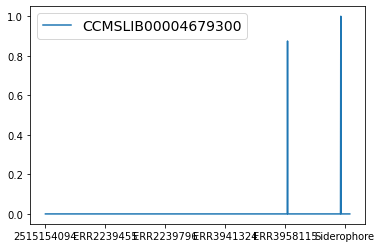

In [41]:
mf_subset1 = final_testing_df.loc['CCMSLIB00004679300'].T

mf_subset1.plot().legend(loc=2, prop={'size': 14})

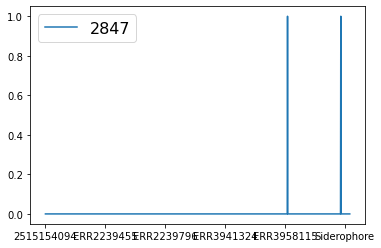

In [34]:
gcf_subset1 = final_training_df[final_training_df['label'] == 'GCF450'].T
gcf_subset1 = gcf_subset1.drop('label')

gcf_subset1.plot().legend(loc=2, prop={'size': 16})

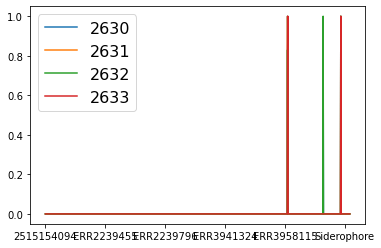

In [37]:
gcf_subset1 = final_training_df[final_training_df['label'] == 'GCF360'].T
gcf_subset1 = gcf_subset1.drop('label')

gcf_subset1.plot().legend(loc=2, prop={'size': 16})

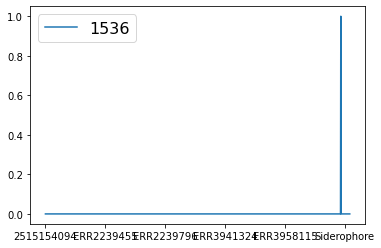

In [38]:
gcf_subset1 = final_training_df[final_training_df['label'] == 'GCF142'].T
gcf_subset1 = gcf_subset1.drop('label')

gcf_subset1.plot().legend(loc=2, prop={'size': 16})

In [ ]:
for key in names_dict.keys():
    updated_name = 'GCA_001767235.region004'
    if names_dict[key] == updated_name:
        input_handle = open("/Volumes/TFL190831/ming_output/antismash/%s.fasta_output_results/%s.gbk"%(updated_name.split('.')[0],key),'r')
        for seq_record in SeqIO.parse(input_handle,'genbank'):
            for feature in seq_record.features:
                if feature.type == 'CDS':
                    if 'gene_functions' in feature.qualifiers:
                        print(feature.qualifiers['gene_functions'])